In [1]:
import sys
import os
sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2
sys.path.append('/Users/amalota/Documents/stable-baselines3/stable-baselines3/ppo')

In [2]:
# pip install git+https://github.com/andrzejmalota/stable-baselines3@custom_cnn_env#egg=stable-baselines3
print()

In [3]:
from stable_baselines3 import PPO
import torch

In [3]:
from stable_baselines3.common.torch_layers import NatureCNN
NatureCNN()

TypeError: __init__() missing 1 required positional argument: 'observation_space'

In [4]:
model = PPO.load('../best_model/ppo/CnnPolicy/best_model.zip')
# model = PPO.load('xd.zip')

RuntimeError: Error(s) in loading state_dict for ActorCriticCnnPolicy:
	size mismatch for features_extractor.linear.0.weight: copying a param with shape torch.Size([128, 1728]) from checkpoint, the shape in current model is torch.Size([512, 208]).
	size mismatch for features_extractor.linear.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for action_net.weight: copying a param with shape torch.Size([7, 128]) from checkpoint, the shape in current model is torch.Size([7, 512]).
	size mismatch for value_net.weight: copying a param with shape torch.Size([1, 128]) from checkpoint, the shape in current model is torch.Size([1, 512]).

In [19]:
features_extractor = model.policy.features_extractor
features_extractor

NatureCNN(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (linear): Sequential(
    (0): Linear(in_features=208, out_features=512, bias=True)
    (1): ReLU()
  )
)

In [6]:
action_net = model.policy.action_net
action_net

Linear(in_features=512, out_features=7, bias=True)

In [22]:
model.observation_space

Box(1, 30, 7)

In [8]:
model.rollout_buffer.observations.shape

(2048, 1, 1, 30, 7)

In [21]:
import numpy as np
np.where(model.rollout_buffer.observations[0] != 0)

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [10]:

rollout = model.rollout_buffer.observations[0:100]
X = torch.Tensor(rollout)

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       ...,



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
     

In [16]:
from torch import nn

class PPOModel(nn.Module):
    def __init__(self):
        super(PPOModel, self).__init__()
        self.features_extractor = model.policy.features_extractor
        self.action_net = model.policy.action_net
        
    def forward(self, x):
        x = self.features_extractor.forward(x)
        return self.action_net.forward(x)

In [17]:
ppo_model = PPOModel()
ppo_model.forward(X)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 2, 2], but got 5-dimensional input of size [100, 1, 1, 30, 7] instead

In [67]:
from captum.attr import IntegratedGradients
import numpy as np
import sys
import utils

In [47]:
import utils
from attribute import IGAttributor
from plot import plot_mean_attributions

In [45]:
ig_attributor = IGAttributor(model=model)
mean_attributions = ig_attributor.get_mean_attributions()

AttributeError: 'IGAttributor' object has no attribute 'model'

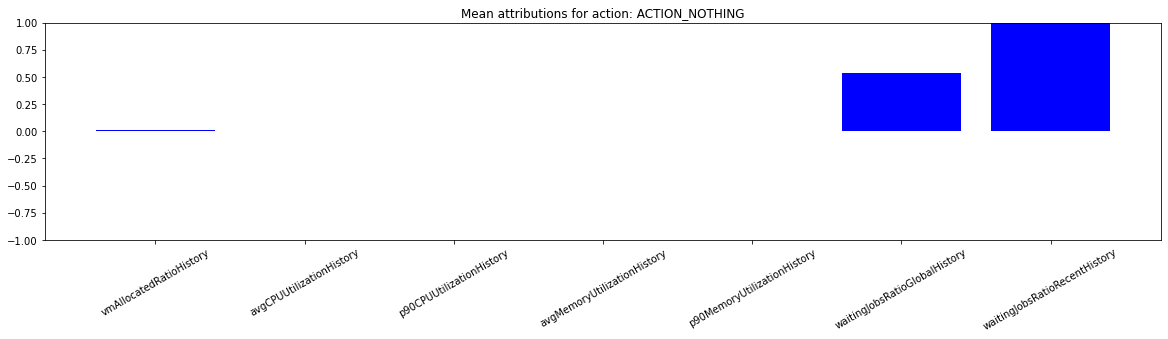

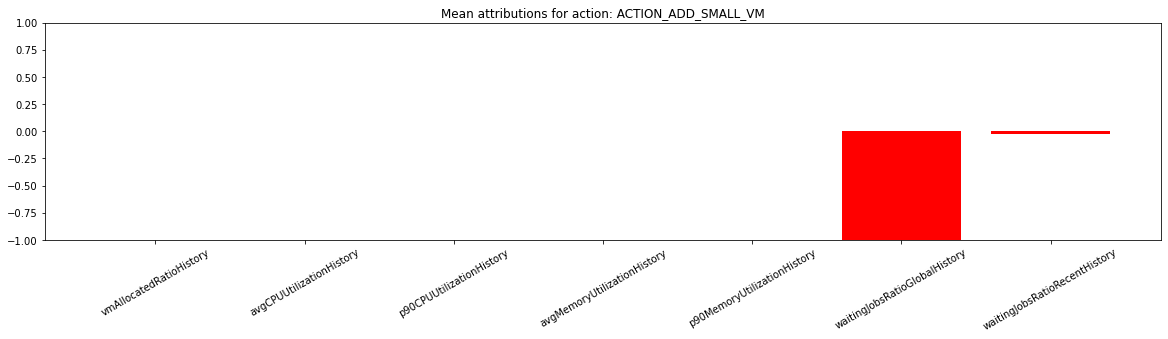

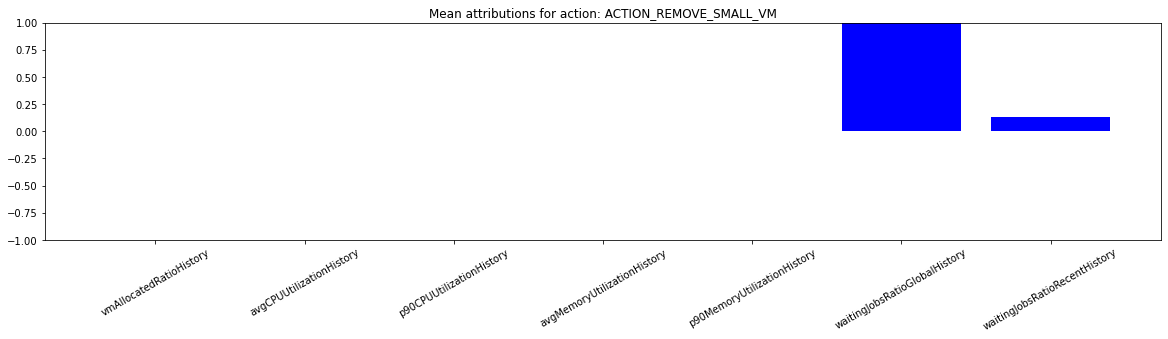

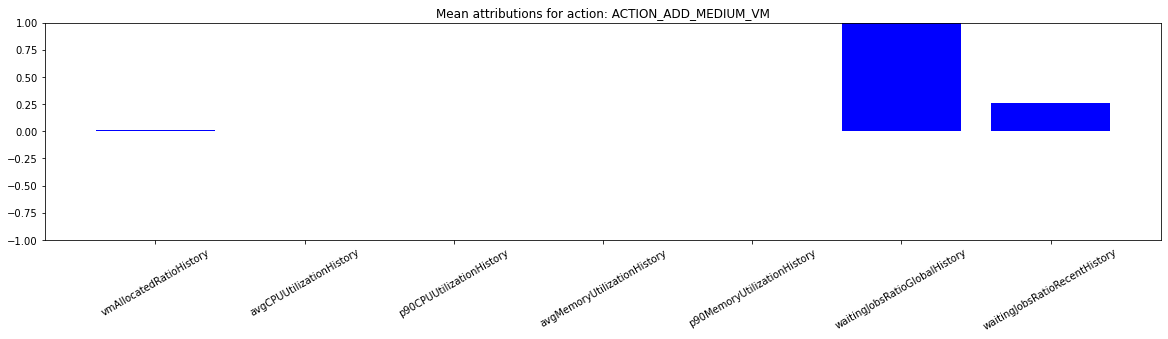

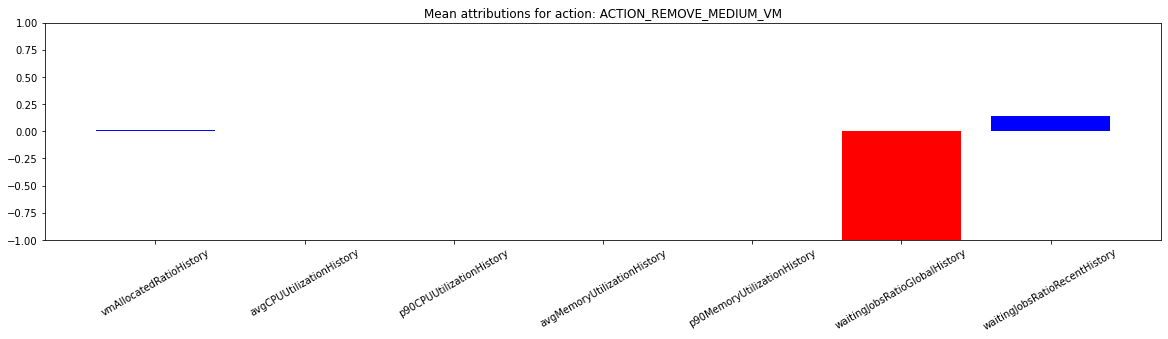

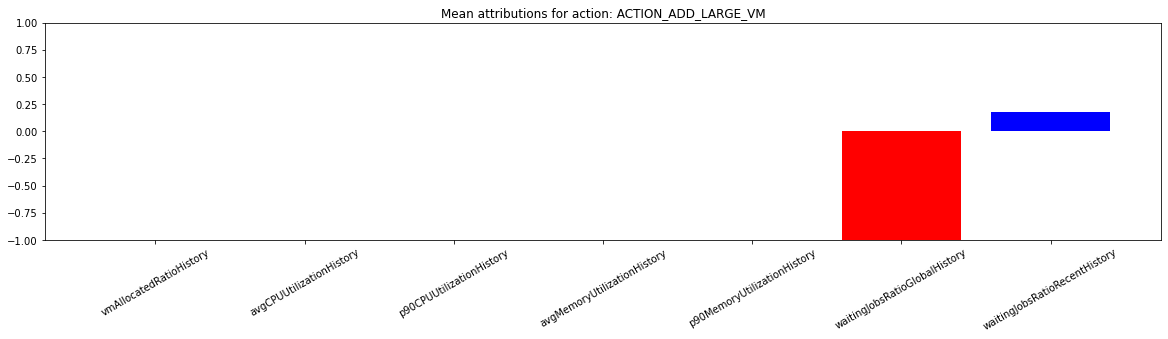

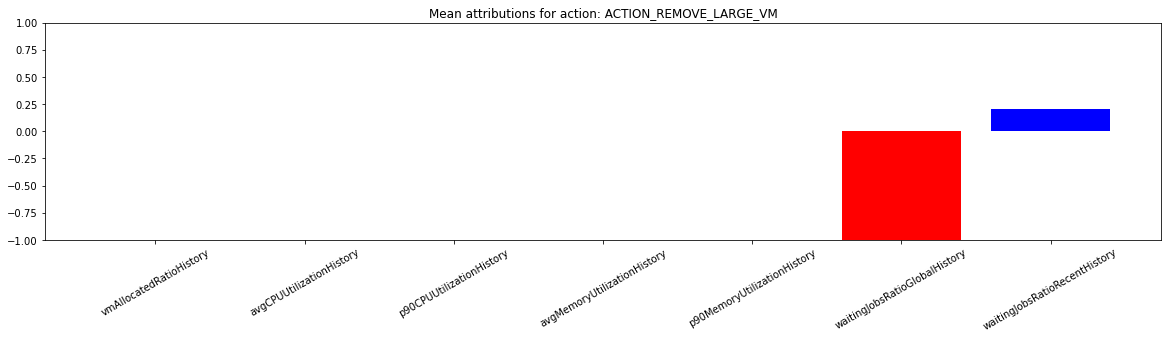

In [27]:
plot_mean_attributions(mean_attributions=mean_attributions)

In [19]:
x_axis_data = np.arange(X.shape[2])

ig = IntegratedGradients(net)

ig_attr_per_action = [ig.attribute(X, n_steps=50, target=target) for target in range(len(FEATURE_NAMES))]
ig_attr_test_norm_sum = [action_att.detach().numpy().sum(0) / np.linalg.norm(action_att.detach().numpy().sum(0), ord=1) for action_att in ig_attr_per_action]

NameError: name 'FEATURE_NAMES' is not defined

In [13]:

ig_attr_test_norm_sum = [action_att.detach().numpy().sum(0) / np.linalg.norm(action_att.detach().numpy().sum(0), ord=1) for action_att in ig_attr_per_action]

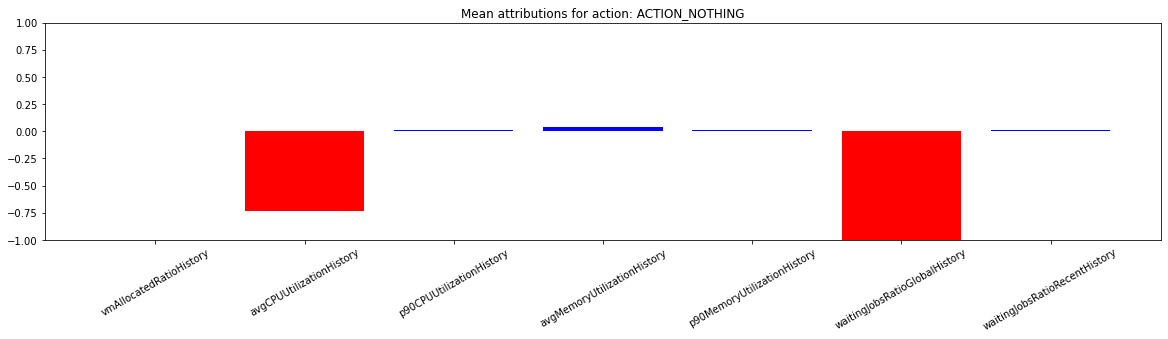

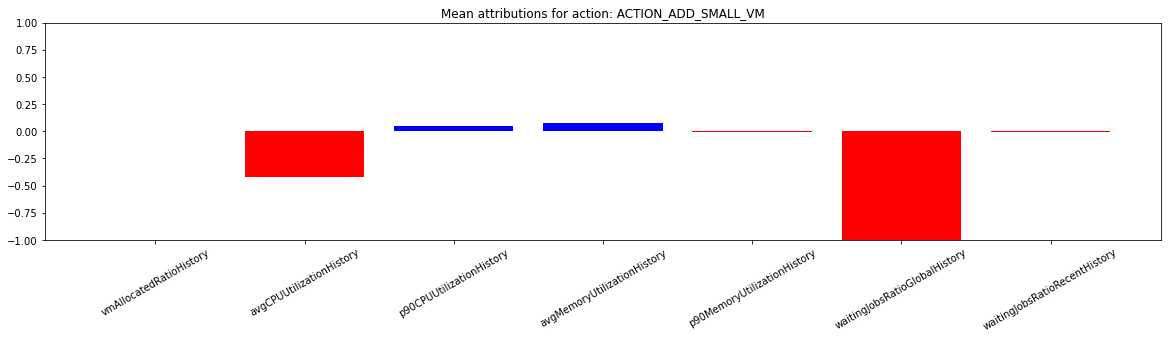

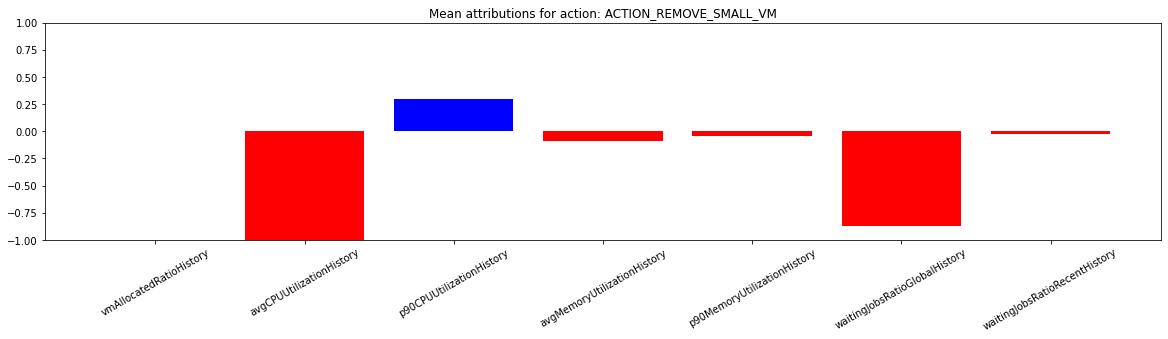

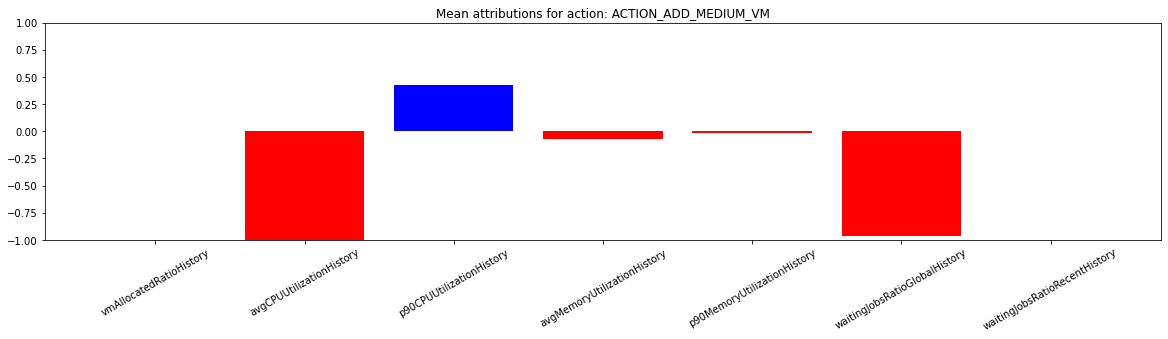

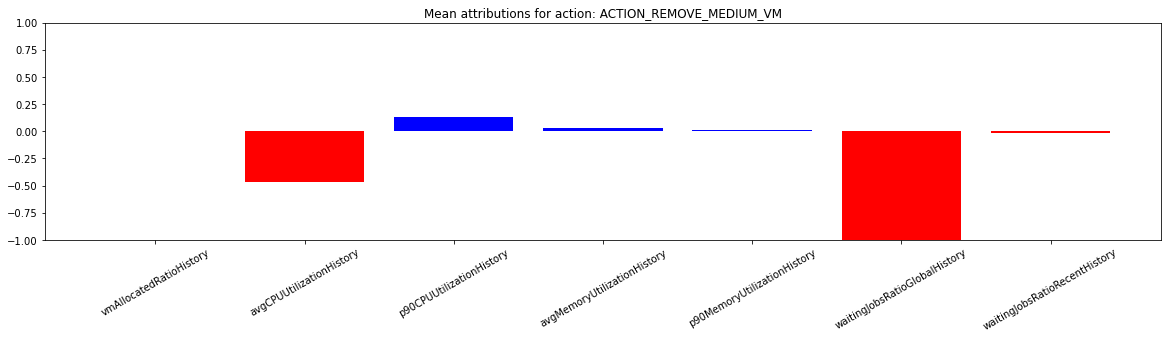

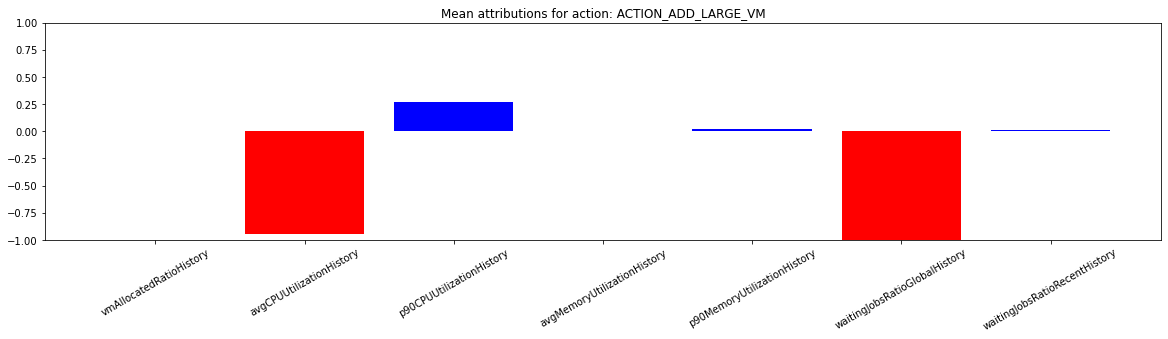

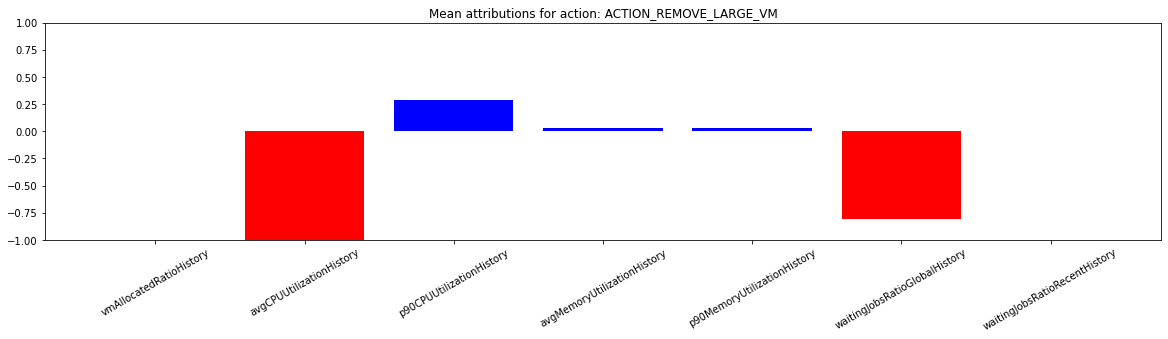

In [96]:
import matplotlib.pyplot as plt

for i, ig_attr in enumerate(ig_attr_test_norm_sum):
    plt.figure(figsize=(20, 4))
    plt.title(f'Mean attributions for action: {action_names[i]}')
    plt.xticks(x_axis_data, feature_names, rotation=30)
    plt.ylim([-1, 1])
    col = []
    for val in ig_attr[0]:
        if val < 0.0:
            col.append('red')
        else:
            col.append('blue')
    plt.bar(x_axis_data, ig_attr[0], color=col)

In [97]:
def render_env(img, feature_names):
    plt.figure(figsize=(20, 4))
    col = []
    for val in img:
        if val < 0.0:
            col.append('red')
        else:
            col.append('blue')
    plt.xticks(range(7), feature_names, rotation=30)
    plt.bar(range(7), img, color=col)
    plt.title('Environment state')
    plt.show()

In [98]:
def explain_action(idx, X, attributions, x_axis_data, feature_names, action_names, model, state=None):
    img = X[idx][0].numpy()
    q_values = model.q_net.forward(X[idx]).detach().numpy()
    action = np.argmax(q_values)
    
    print(f'Action made: {action_names[action]}')
    
    render_env(img=img,
           feature_names=feature_names)
    
    fig, axs = plt.subplots(len(attributions), 1, figsize=(20, 20), sharex=True)
    plt.xticks(x_axis_data, feature_names, rotation=30)
    for i, ig_attr in enumerate(attributions):
        axs[i].set_title(f'Attributions for action: {action_names[i]}')
        col = []
        ig_attr = ig_attr.numpy()[idx][0]
        for val in ig_attr:
            if val < 0.0:
                col.append('red')
            else:
                col.append('blue')
        axs[i].bar(x_axis_data, ig_attr, color=col)
    


Action made: ACTION_REMOVE_MEDIUM_VM


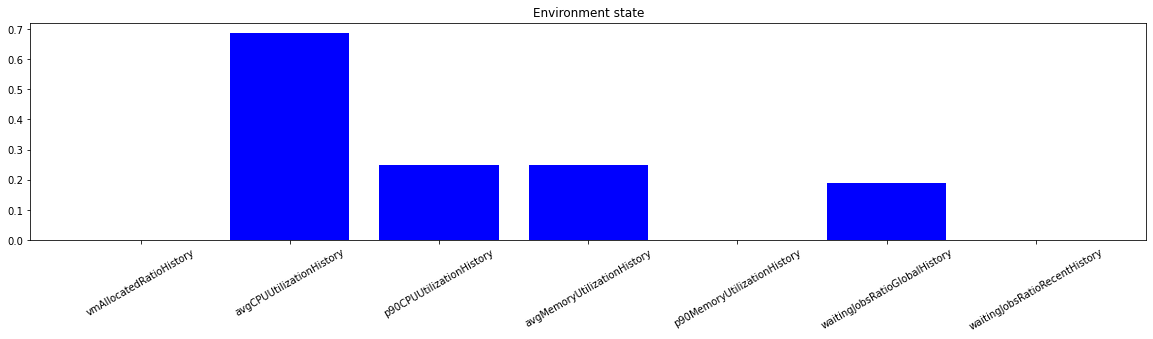

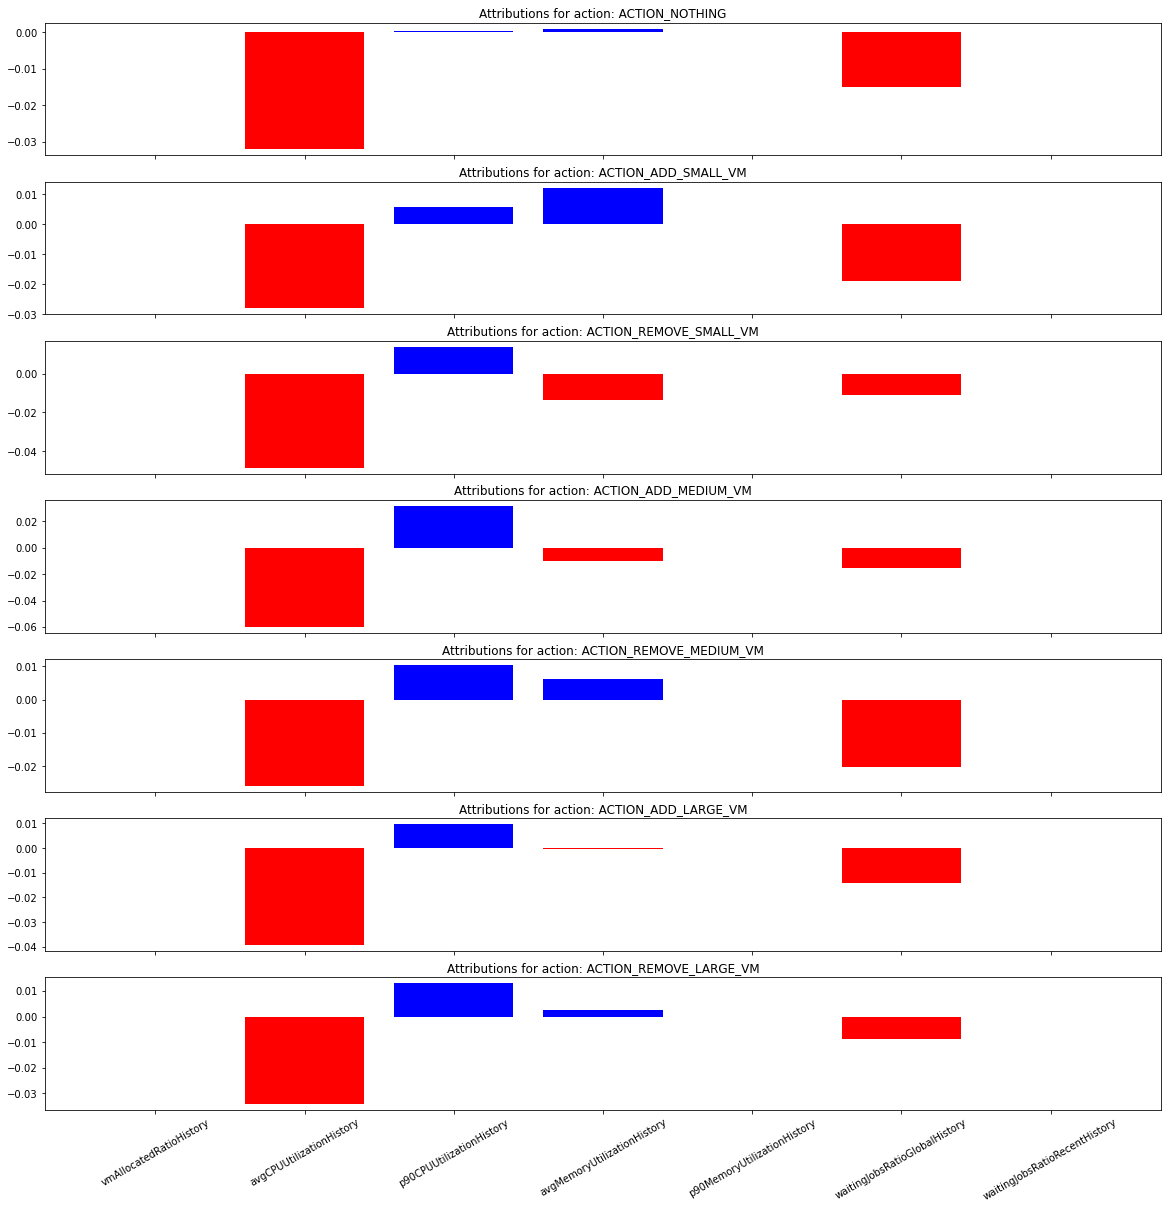

In [114]:
explain_action(idx=25,
               X=X,
               attributions=ig_attr_per_action,
               x_axis_data=x_axis_data,
               feature_names=feature_names,
               action_names=action_names,
               model=model,
              )

In [86]:
X_manual = torch.Tensor([[[0, 1, 1, 1, 1, 1, 1]]])

In [120]:
X_manual = torch.Tensor([[[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]])

In [127]:
X_manual = torch.Tensor([[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]])

In [124]:
X_manual.shape

torch.Size([1, 1, 7])

In [128]:
x_axis_data = np.arange(X_manual.shape[2])

ig = IntegratedGradients(net)

ig_attr_per_action = [ig.attribute(X_manual, n_steps=50, target=target) for target in range(len(action_names))]
ig_attr_test_norm_sum = [action_att.detach().numpy().sum(0) / np.linalg.norm(action_att.detach().numpy().sum(0), ord=1) for action_att in ig_attr_per_action]

Action made: ACTION_REMOVE_MEDIUM_VM


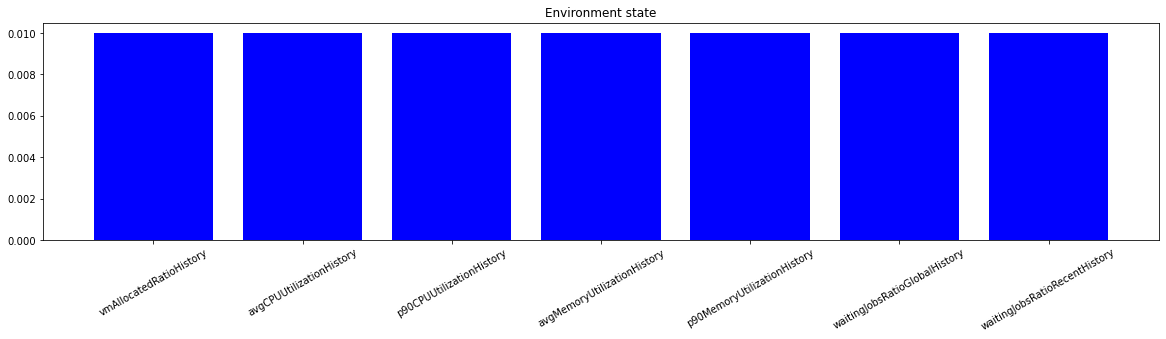

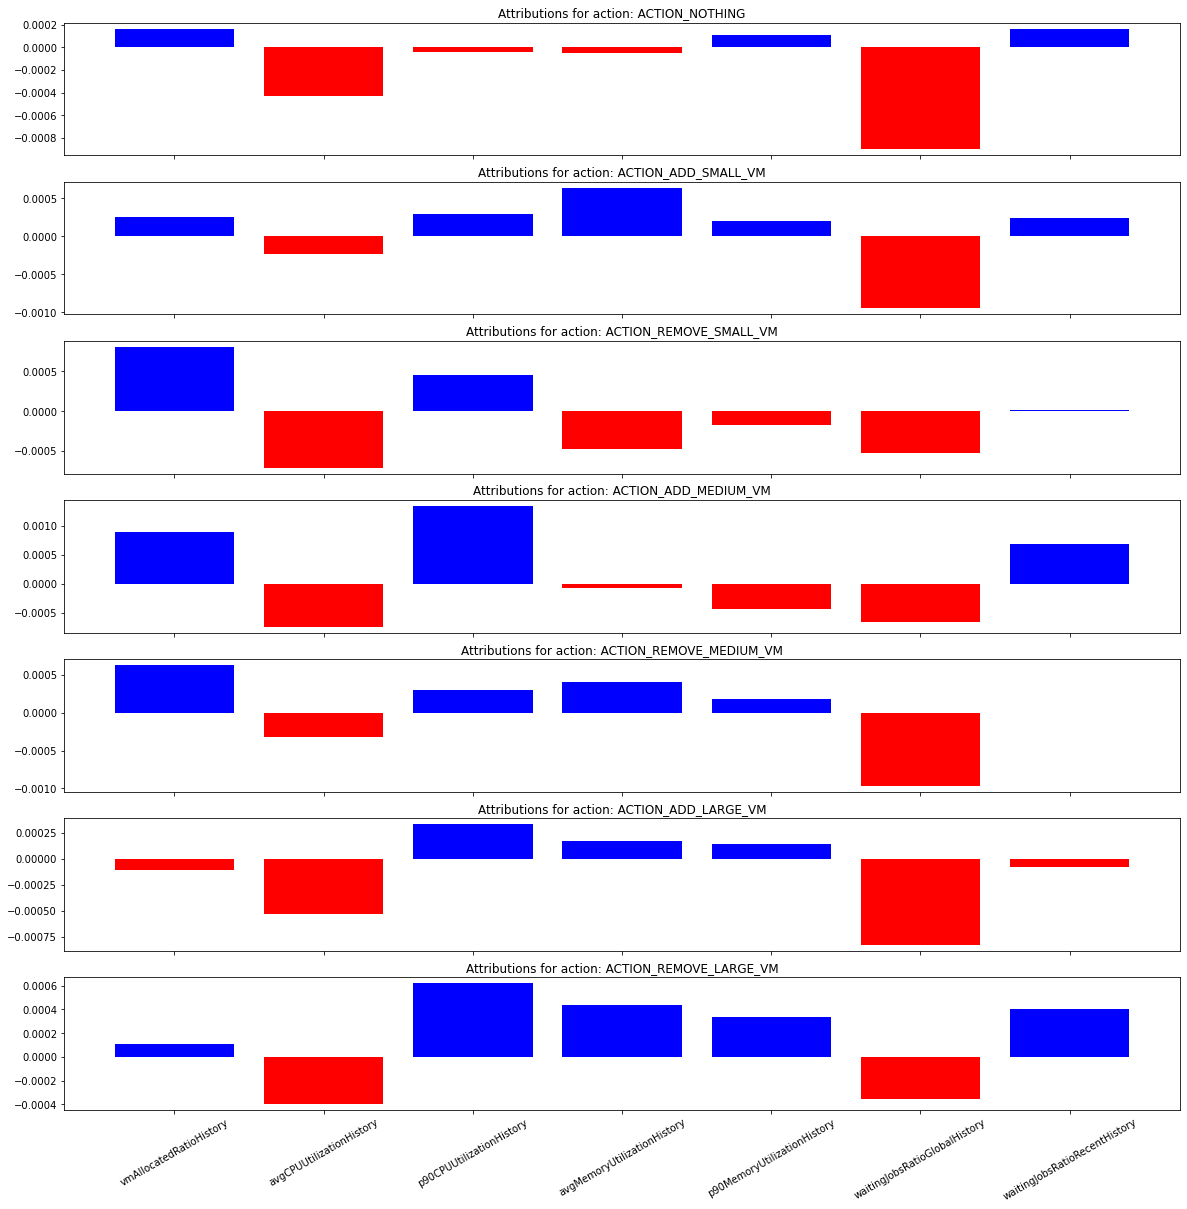

In [129]:
explain_action(idx=0,
               X=X_manual,
               attributions=ig_attr_per_action,
               x_axis_data=x_axis_data,
               feature_names=feature_names,
               action_names=action_names,
               model=model,
              )